Let's use this notebook for some experiments. 

In [3]:
from NMF import *
%matplotlib inline

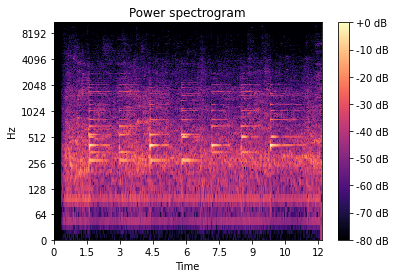

In [4]:
filename = './data/Chords.wav'
ViolinRecording = Recording(filename)
ViolinSpectrogram = ViolinRecording.compute_spectrogram()
ViolinSpectrogram.visualize()
# ViolinSpectrogram.restore_recording("./data/exp.wav")

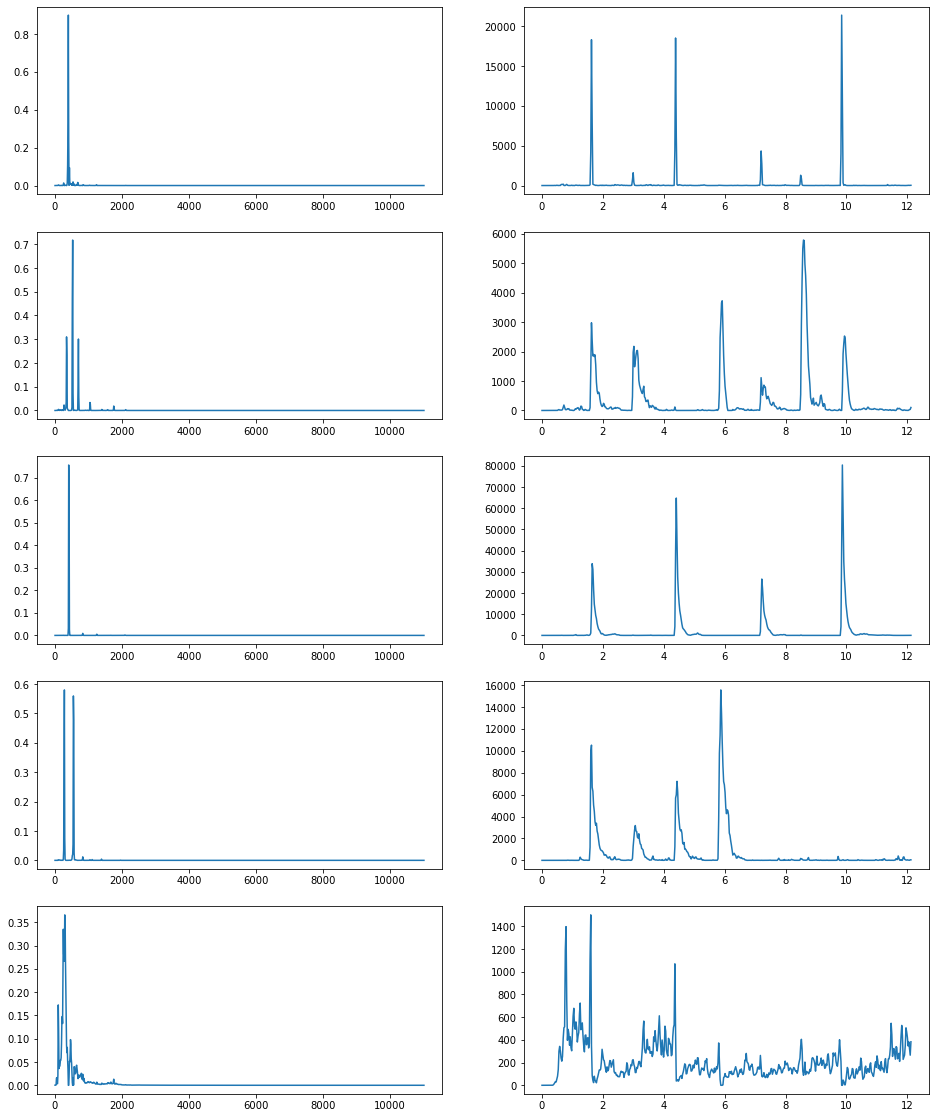

[ 67.2  53.   68.   61.  108.4]


In [5]:
K = 5
matrix_to_factorize = NMF(ViolinSpectrogram.compute_matrix())
W, H, WH = matrix_to_factorize.factorize_KL(K, 5000)
# C_matrices = matrix_to_factorize.wiener_reconstruction(W, H, WH)
plot_freq_times(W, H, ViolinSpectrogram)

pitches 61 and 68 are good. 

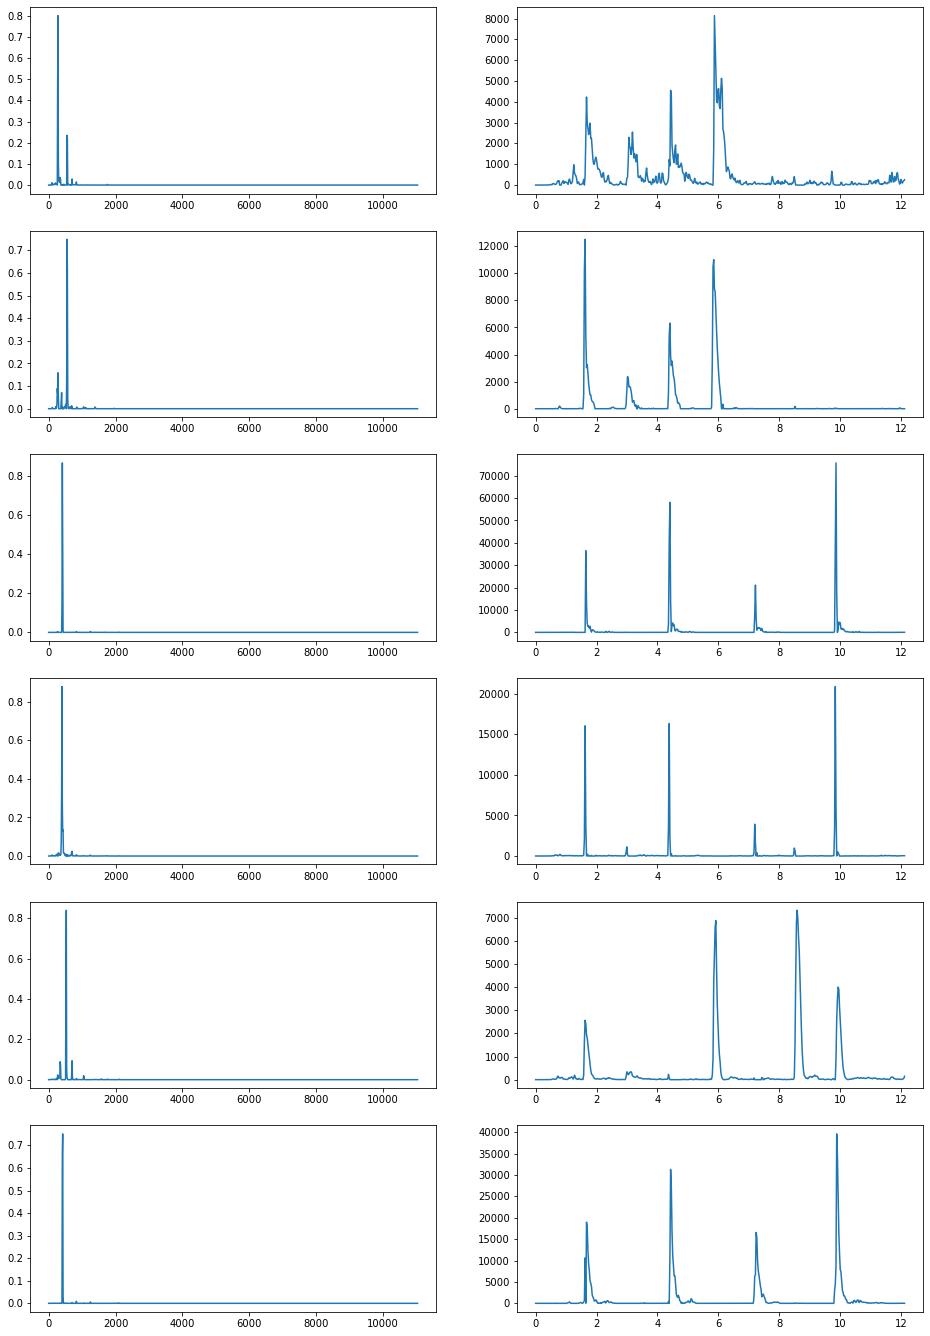

[61.  61.  67.8 67.2 53.  68. ]


In [6]:
K = 6
matrix_to_factorize = NMF(ViolinSpectrogram.compute_matrix())
W, H, WH = matrix_to_factorize.factorize_EUC(K, 5000)
# C_matrices = matrix_to_factorize.wiener_reconstruction(W, H, WH)
plot_freq_times(W, H, ViolinSpectrogram)

61 appeared twice. 67-68 three times.

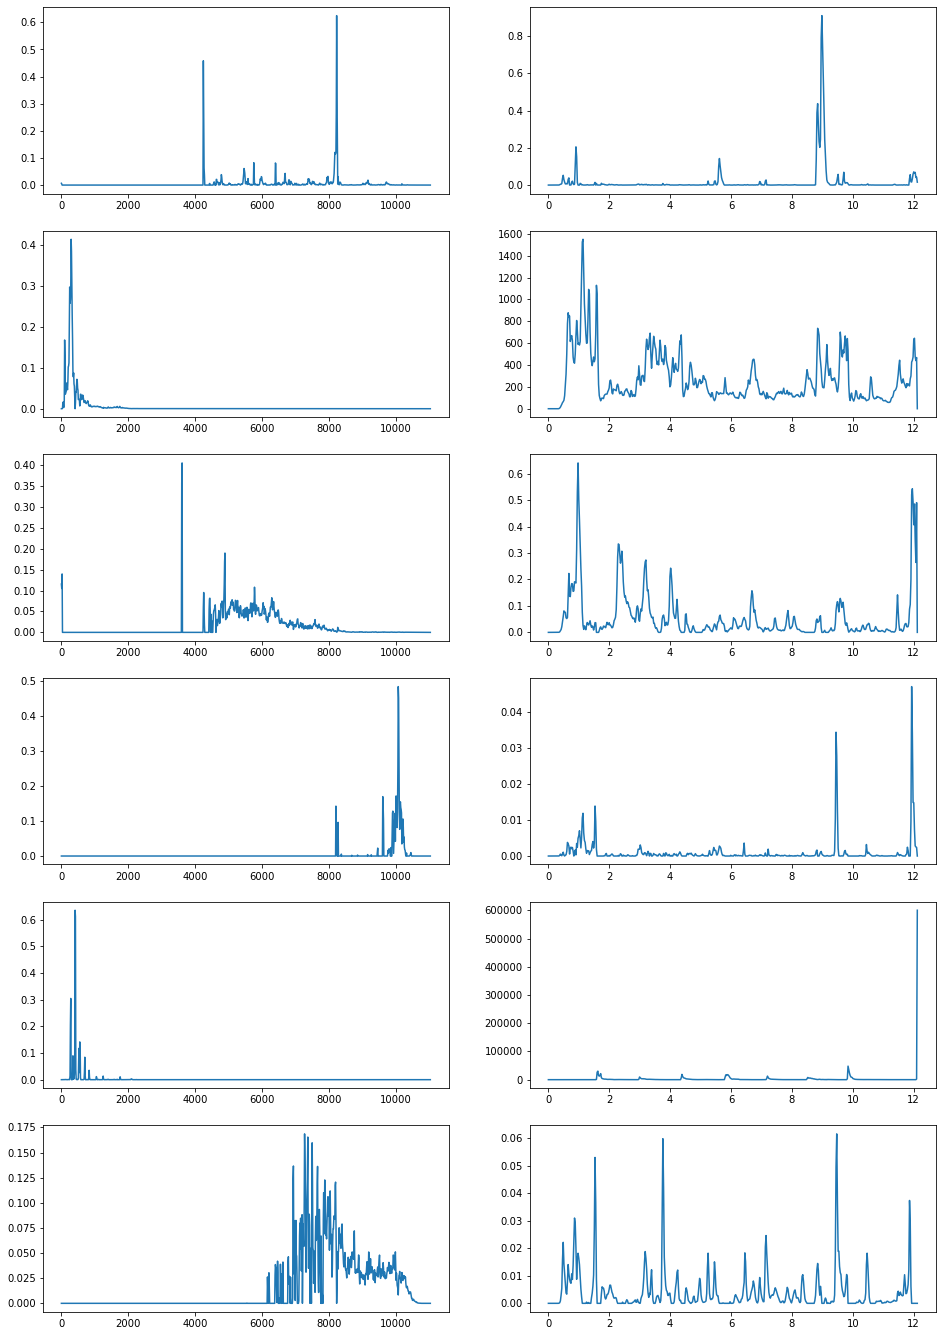

[ 95.8 108.4  86.6  95.4  49.  106.6]


In [7]:
K = 6
matrix_to_factorize = NMF(ViolinSpectrogram.compute_matrix())
W, H, WH = matrix_to_factorize.factorize_MU_IS(K, 5000)
# C_matrices = matrix_to_factorize.wiener_reconstruction(W, H, WH)
plot_freq_times(W, H, ViolinSpectrogram)

/home/maria/MachineLearning/NMF.py:387: RuntimeWarning: invalid value encountered in log
  return x / (y+1e-09) - (np.log(x+1e-09) - np.log(y+1e-09)) - 1


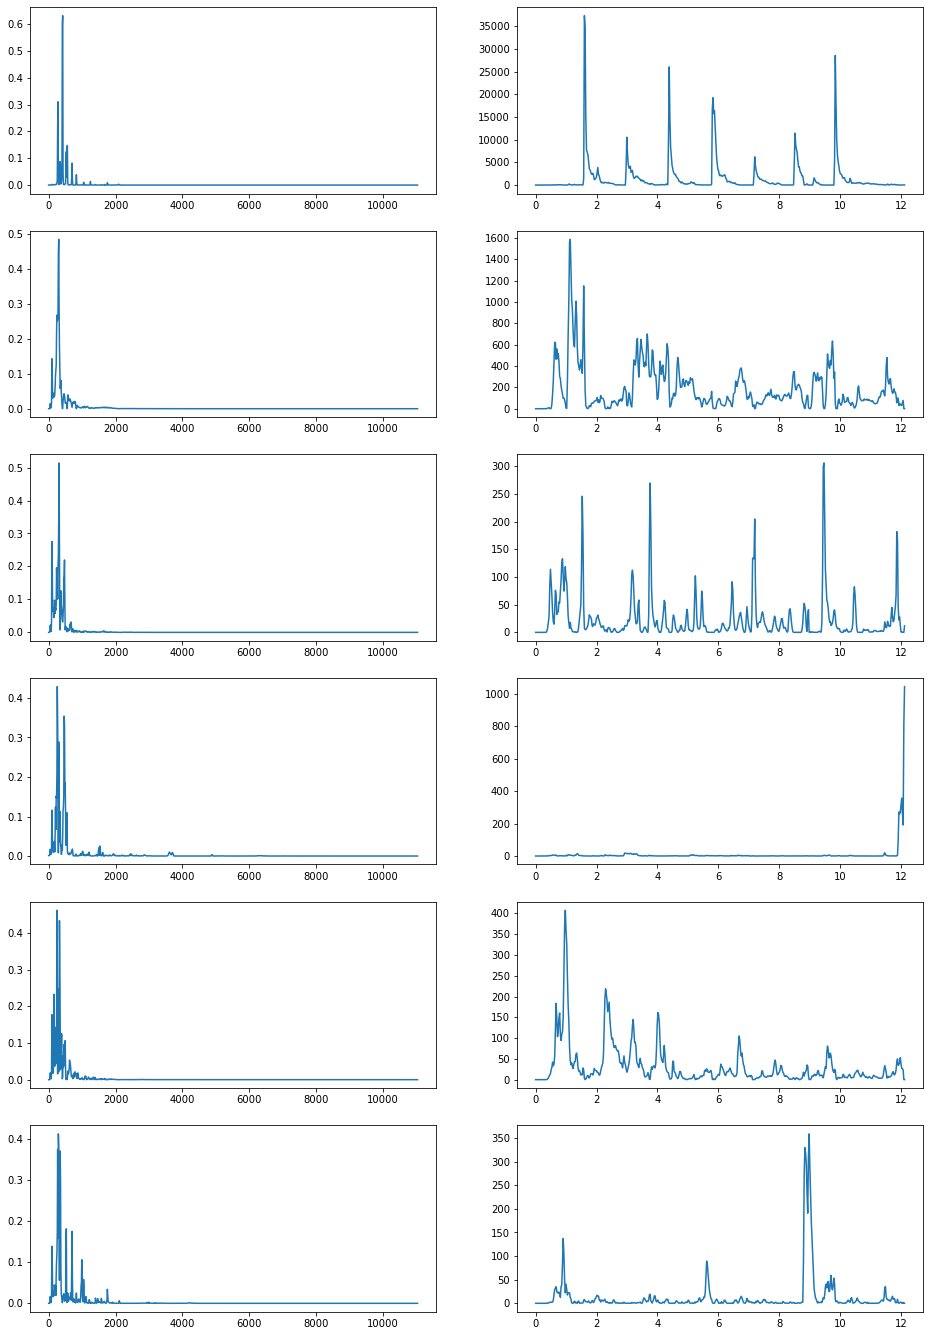

[ 49.  108.4 108.4 108.4 108.4 108.4]


In [8]:
K = 6
matrix_to_factorize = NMF(ViolinSpectrogram.compute_matrix())
W, H, WH = matrix_to_factorize.factorize_EM_IS(K, 5000)
# C_matrices = matrix_to_factorize.wiener_reconstruction(W, H, WH)
plot_freq_times(W, H, ViolinSpectrogram)

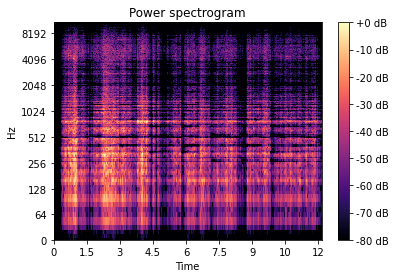

In [5]:
new_spectrogram = Spectrogram(C_matrices[3], ViolinSpectrogram.fs)
new_spectrogram.visualize()
new_spectrogram.restore_recording("./data/exp_note.wav")

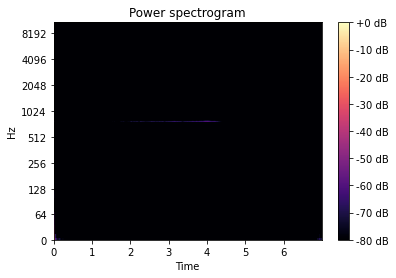

In [4]:
new_spectrogram = Spectrogram(np.sqrt(W @ H), ViolinSpectrogram.fs)
new_spectrogram.visualize()
new_spectrogram.restore_recording("./data/exp_note.wav")

In [9]:
print(get_pitches(W, ViolinSpectrogram.compute_frequencies_times()[0])[0])

[ 49.   59.8 108.4 108.4 108.4]
